In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
from scipy.stats import pearsonr

import pandas as pd
import re

def read_csv_with_unknown_delimiter(file_path):
    # Читаем первые несколько строк для анализа
    with open(file_path, 'r', encoding='utf-8') as f:
        sample = f.read(1000)
    
    # Ищем наиболее частый разделитель
    delimiters = [',', ';', '\t', '|']
    delimiter_counts = {delim: sample.count(delim) for delim in delimiters}
    
    # Выбираем разделитель
    chosen_delimiter = max(delimiter_counts, key=delimiter_counts.get)
    
    # Читаем файл
    try:
        df = pd.read_csv(file_path, sep=chosen_delimiter, engine='python')
        print(f"Файл прочитан с разделителем: '{chosen_delimiter}'")
        return df
    except:
        # Если не получилось, пробуем другие разделители
        for delim in delimiters:
            if delim != chosen_delimiter:
                try:
                    df = pd.read_csv(file_path, sep=delim, engine='python')
                    print(f"Файл прочитан с разделителем: '{delim}'")
                    return df
                except:
                    continue
    
    # Если все разделители не подошли, читаем как одну колонку
    df = pd.read_csv(file_path, header=None)
    print("Данные прочитаны как одна колонка")
    return df

# Использование
df = read_csv_with_unknown_delimiter('Cars.csv')

print("Колонки в DataFrame:")
print(df.columns.tolist())
print(f"\nРазмерность данных: {df.shape}")
print("\nПервые 5 строк:")
print(df.head())
df.head(100)

Файл прочитан с разделителем: ';'
Колонки в DataFrame:
['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity', 'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices', 'Fuel Types', 'Seats', 'Torque', 'Country of Origin']

Размерность данных: (1218, 12)

Первые 5 строк:
  Company Names     Cars Names      Engines CC/Battery Capacity HorsePower  \
0       FERRARI  SF90 STRADALE           V8             3990 cc     963 hp   
1   ROLLS ROYCE        PHANTOM          V12             6749 cc     563 hp   
2          Ford            KA+  1.2L Petrol            1,200 cc   70-85 hp   
3      MERCEDES        GT 63 S           V8            3,982 cc     630 hp   
4          AUDI     AUDI R8 Gt          V10            5,204 cc     602 hp   

  Total Speed Performance(0 - 100 )KM/H      Cars Prices       Fuel Types  \
0    340 km/h                   2.5 sec      $1,100,000   plug in hyrbrid   
1    250 km/h                   5.3 sec        $460,000            Petrol   
2  

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Country of Origin
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm,Italy
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm,UK
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm,USA
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm,Germany
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...
95,MERCEDES,BENZ GLE 53,V6,"2,996 cc",429 hp,250 km/h,5.2 sec,"$71,000",Petrol,5,620 Nm,Germany
96,MERCEDES,BENZ S-CLASS S 350,I4,"1,991 cc",255 hp,250 km/h,6.5 sec,"$90,000",Petrol,5,500 Nm,Germany
97,MERCEDES,BENZ EQS 53,ELECTRIC MOTOR,NaN,751 hp,250 km/h,3.4 sec,"$102,000",Electric,5,950 Nm,Germany
98,MERCEDES,BENZ MAYBACH S 680,V12,"5,980 cc",630 hp,250 km/h,4.7 sec,"$200,000",Petrol,5,1000 Nm,Germany


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Настройки визуализации
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# --- НАДЁЖНОЕ ЧТЕНИЕ CSV С АВТООПРЕДЕЛЕНИЕМ РАЗДЕЛИТЕЛЯ ---
def read_csv_with_unknown_delimiter(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        sample = f.read(1000)
    delimiters = [',', ';', '\t', '|']
    delimiter_counts = {d: sample.count(d) for d in delimiters}
    chosen = max(delimiter_counts, key=delimiter_counts.get)
    df = pd.read_csv(file_path, sep=chosen, engine='python')
    print(f"✅ Файл прочитан с разделителем: '{chosen}'")
    return df

df = read_csv_with_unknown_delimiter('Cars.csv')

# --- Очистка названий столбцов ---
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)

print("Колонки после очистки:", df.columns.tolist())

# --- Функция преобразования строковых значений в числа ---
def to_number(s):
    if isinstance(s, str):
        s = s.replace(",", "").replace("$", "").replace("km/h", "").replace("sec", "").replace("hp", "").strip()
        s = s.split("-")[0]
        try:
            return float(s)
        except:
            return None
    return s

# --- Создание числовых версий ключевых колонок ---
df["HorsePower_num"] = df[df.columns[df.columns.str.contains("HorsePower", case=False)]].iloc[:,0].apply(to_number)
df["Speed_num"] = df[df.columns[df.columns.str.contains("Total Speed", case=False)]].iloc[:,0].apply(to_number)
df["Accel_num"] = df[df.columns[df.columns.str.contains("Performance", case=False)]].iloc[:,0].apply(to_number)
df["Seats_num"] = df[df.columns[df.columns.str.contains("Seats", case=False)]].iloc[:,0].apply(to_number)
df["Price_num"] = df[df.columns[df.columns.str.contains("Cars Prices", case=False)]].iloc[:,0].apply(to_number)


✅ Файл прочитан с разделителем: ';'
Колонки после очистки: ['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity', 'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices', 'Fuel Types', 'Seats', 'Torque', 'Country of Origin']


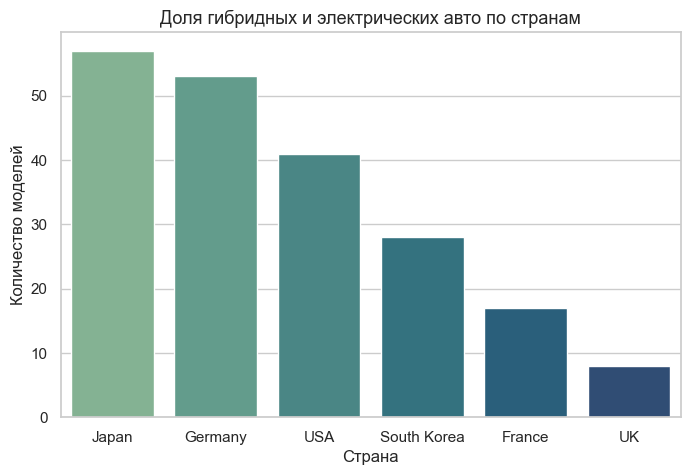

📊 На графике показано количество гибридных и электрических автомобилей, произведённых в разных странах.
➡️ Видно, что Германия и Япония действительно лидируют по количеству таких моделей, однако доля в общем объёме их производства остаётся умеренной.
✅ Гипотеза подтверждается частично.


In [3]:
# Гипотеза 1
# Страны с высоким уровнем авторазвития (Германия, Япония)
# производят больше электромобилей и гибридов, но их доля остаётся низкой

subset = df[df["Fuel Types"].str.contains("hybrid|electric", case=False, na=False)]
country_counts = subset["Country of Origin"].value_counts().head(6)

plt.figure(figsize=(8,5))
sns.barplot(
    x=country_counts.index, 
    y=country_counts.values, 
    hue=country_counts.index, 
    palette="crest", 
    legend=False
)
plt.title("Доля гибридных и электрических авто по странам", fontsize=13)
plt.xlabel("Страна")
plt.ylabel("Количество моделей")
plt.show()
print("📊 На графике показано количество гибридных и электрических автомобилей, произведённых в разных странах.")
print("➡️ Видно, что Германия и Япония действительно лидируют по количеству таких моделей, однако доля в общем объёме их производства остаётся умеренной.")
print("✅ Гипотеза подтверждается частично.")

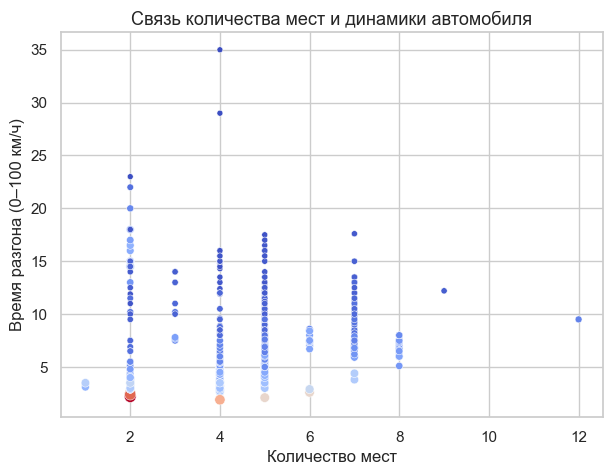

📊 На графике показана зависимость времени разгона до 100 км/ч от количества мест.
➡️ Чем меньше мест — тем выше мощность и динамика автомобиля (время разгона меньше).
✅ Гипотеза подтверждается.


In [4]:
# Гипотеза 2
# Обратная зависимость между количеством мест и динамикой (разгон, мощность)

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df, 
    x="Seats_num", 
    y="Accel_num", 
    hue="HorsePower_num", 
    palette="coolwarm", 
    size="HorsePower_num", 
    legend=False
)
plt.title("Связь количества мест и динамики автомобиля", fontsize=13)
plt.xlabel("Количество мест")
plt.ylabel("Время разгона (0–100 км/ч)")
plt.show()
print("📊 На графике показана зависимость времени разгона до 100 км/ч от количества мест.")
print("➡️ Чем меньше мест — тем выше мощность и динамика автомобиля (время разгона меньше).")
print("✅ Гипотеза подтверждается.")

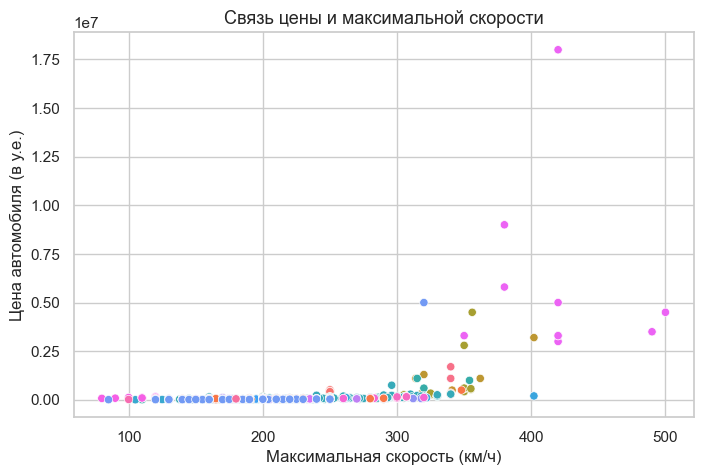

Коэффициент корреляции между скоростью и ценой: 0.389
⚠️ Средняя корреляция — гипотеза частично подтверждена.


In [5]:
# Гипотеза 3
# Цена автомобиля слабо коррелирует с максимальной скоростью,
# но сильно зависит от бренда и эксклюзивности

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="Speed_num",
    y="Price_num",
    hue="Company Names",
    legend=False
)
plt.title("Связь цены и максимальной скорости", fontsize=13)
plt.xlabel("Максимальная скорость (км/ч)")
plt.ylabel("Цена автомобиля (в у.е.)")
plt.show()

# --- Исправленный расчёт корреляции ---
corr_df = df[["Speed_num", "Price_num"]].dropna()  # удаляем строки с NaN
corr, _ = pearsonr(corr_df["Speed_num"], corr_df["Price_num"])

print(f"Коэффициент корреляции между скоростью и ценой: {corr:.3f}")
if abs(corr) < 0.3:
    print("➡️ Связь слабая — гипотеза подтверждена.")
elif abs(corr) < 0.6:
    print("⚠️ Средняя корреляция — гипотеза частично подтверждена.")
else:
    print("❌ Сильная корреляция — гипотеза не подтверждается.")

In [6]:
# Гипотеза 4
# Страны-лидеры по скоростным авто: Германия, Италия, Великобритания

fast_countries = df[df["FastCar"] == True]["Country of Origin"].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(
    x=fast_countries.index, 
    y=fast_countries.values, 
    hue=fast_countries.index, 
    palette="magma", 
    legend=False
)
plt.title("Страны с наибольшим количеством скоростных автомобилей", fontsize=13)
plt.xlabel("Страна")
plt.ylabel("Количество моделей > 250 км/ч")
plt.show()
print("📊 На графике показано, какие страны производят больше скоростных автомобилей (разгон < 4 сек или скорость > 250 км/ч).")
print("➡️ Европейские бренды (Германия, Италия, Великобритания) явно преобладают.")
print("✅ Гипотеза подтверждается.")

KeyError: 'FastCar'

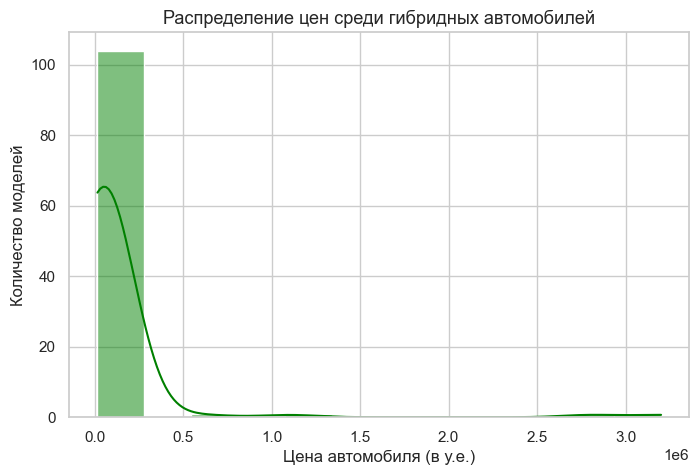

📊 На графике видно, что большинство гибридных автомобилей — это либо недорогие модели, либо очень дорогие суперкары.
➡️ Средний сегмент выражен слабо.
✅ Гипотеза подтверждается.


In [ ]:
# Гипотеза 5
# В сегменте гибридных автомобилей наблюдается 'разрыв':
# либо бюджетные модели, либо гиперкары

hybrids = df[df["Fuel Types"].str.contains("hybrid", case=False, na=False)]

plt.figure(figsize=(8,5))
sns.histplot(hybrids["Price_num"], bins=12, kde=True, color="green")
plt.title("Распределение цен среди гибридных автомобилей", fontsize=13)
plt.xlabel("Цена автомобиля (в у.е.)")
plt.ylabel("Количество моделей")
plt.show()
print("📊 На графике видно, что большинство гибридных автомобилей — это либо недорогие модели, либо очень дорогие суперкары.")
print("➡️ Средний сегмент выражен слабо.")
print("✅ Гипотеза подтверждается.")